In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = pd.read_csv('Data-GP1.csv')

In [3]:
df

,num_seats_total,mean_net_ticket_price,Dept_Date,Purchase_Date,Train_Number_All,Culmulative_sales,isNormCabin,isReturn,isOneway,Customer_Cat
0,1,188.663422,10/9/19,10/10/18,A,1,1,0,0,A
1,1,358.428869,5/27/19,6/6/18,B,1,0,1,0,A
2,1,356.372684,5/31/20,6/17/19,B,1,0,1,0,A
3,1,396.370505,12/10/19,12/27/18,C,1,0,1,0,A
4,1,364.264552,5/31/20,6/19/19,B,2,0,1,0,A
...,...,...,...,...,...,...,...,...,...,...
209692,4,468.650069,3/26/19,3/26/19,L,4,0,0,0,B
209693,1,468.659177,12/21/18,12/21/18,J,1,0,0,1,B
209694,1,668.061946,6/9/19,6/9/19,J,10,0,0,0,B
209695,2,381.438513,1/17/19,1/17/19,L,17,0,0,0,B


In [4]:
# date from object to datetype
df['Dept_Date'] = pd.to_datetime(df['Dept_Date'], format='%m/%d/%y')
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'], format='%m/%d/%y')

In [5]:
df

,num_seats_total,mean_net_ticket_price,Dept_Date,Purchase_Date,Train_Number_All,Culmulative_sales,isNormCabin,isReturn,isOneway,Customer_Cat
0,1,188.663422,2019-10-09,2018-10-10,A,1,1,0,0,A
1,1,358.428869,2019-05-27,2018-06-06,B,1,0,1,0,A
2,1,356.372684,2020-05-31,2019-06-17,B,1,0,1,0,A
3,1,396.370505,2019-12-10,2018-12-27,C,1,0,1,0,A
4,1,364.264552,2020-05-31,2019-06-19,B,2,0,1,0,A
...,...,...,...,...,...,...,...,...,...,...
209692,4,468.650069,2019-03-26,2019-03-26,L,4,0,0,0,B
209693,1,468.659177,2018-12-21,2018-12-21,J,1,0,0,1,B
209694,1,668.061946,2019-06-09,2019-06-09,J,10,0,0,0,B
209695,2,381.438513,2019-01-17,2019-01-17,L,17,0,0,0,B


In [6]:
df.head()

,num_seats_total,mean_net_ticket_price,Dept_Date,Purchase_Date,Train_Number_All,Culmulative_sales,isNormCabin,isReturn,isOneway,Customer_Cat
0,1,188.663422,2019-10-09,2018-10-10,A,1,1,0,0,A
1,1,358.428869,2019-05-27,2018-06-06,B,1,0,1,0,A
2,1,356.372684,2020-05-31,2019-06-17,B,1,0,1,0,A
3,1,396.370505,2019-12-10,2018-12-27,C,1,0,1,0,A
4,1,364.264552,2020-05-31,2019-06-19,B,2,0,1,0,A


In [7]:
df['days_in_advance'] = (df['Dept_Date'] - df['Purchase_Date']).dt.days

In [8]:
df

,num_seats_total,mean_net_ticket_price,Dept_Date,Purchase_Date,Train_Number_All,Culmulative_sales,isNormCabin,isReturn,isOneway,Customer_Cat,days_in_advance
0,1,188.663422,2019-10-09,2018-10-10,A,1,1,0,0,A,364
1,1,358.428869,2019-05-27,2018-06-06,B,1,0,1,0,A,355
2,1,356.372684,2020-05-31,2019-06-17,B,1,0,1,0,A,349
3,1,396.370505,2019-12-10,2018-12-27,C,1,0,1,0,A,348
4,1,364.264552,2020-05-31,2019-06-19,B,2,0,1,0,A,347
...,...,...,...,...,...,...,...,...,...,...,...
209692,4,468.650069,2019-03-26,2019-03-26,L,4,0,0,0,B,0
209693,1,468.659177,2018-12-21,2018-12-21,J,1,0,0,1,B,0
209694,1,668.061946,2019-06-09,2019-06-09,J,10,0,0,0,B,0
209695,2,381.438513,2019-01-17,2019-01-17,L,17,0,0,0,B,0


Explore Data Analysis (EDA)

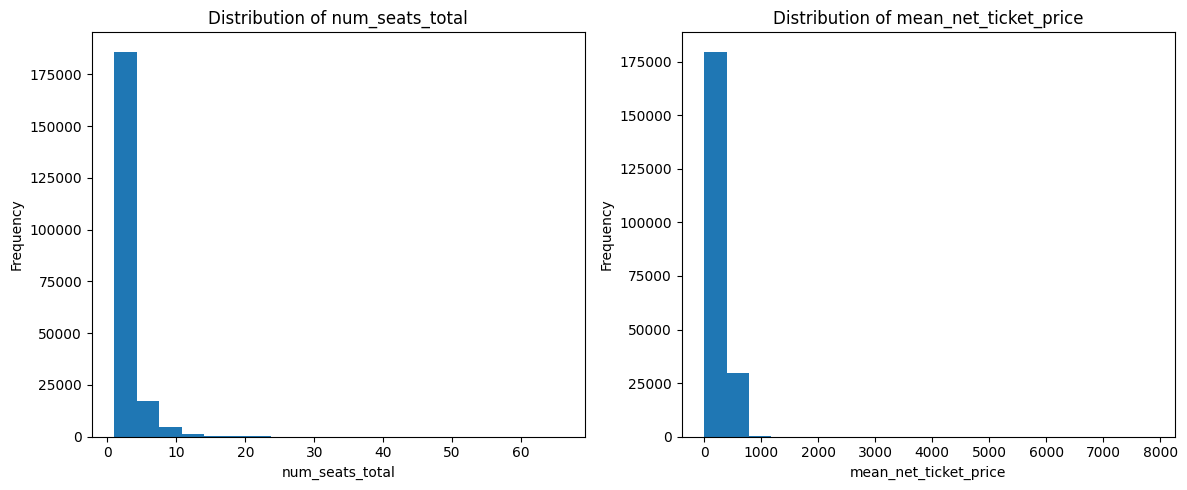

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 hàng 2 cột

# Histogram 1
df['num_seats_total'].plot(
    kind='hist', bins=20, ax=axes[0], title='Distribution of num_seats_total'
)
axes[0].set_xlabel('num_seats_total')

# Histogram 2
df['mean_net_ticket_price'].plot(
    kind='hist', bins=20, ax=axes[1], title='Distribution of mean_net_ticket_price'
)
axes[1].set_xlabel('mean_net_ticket_price')

plt.tight_layout()
plt.show()

In [10]:
desc = df[['num_seats_total', 'mean_net_ticket_price']].describe()
print(desc)

       num_seats_total  mean_net_ticket_price
count    209697.000000          209697.000000
mean          2.383019             230.116900
std           2.083324             147.024784
min           1.000000               1.278969
25%           1.000000             108.870193
50%           2.000000             186.282199
75%           3.000000             350.409481
max          66.000000            7855.766106


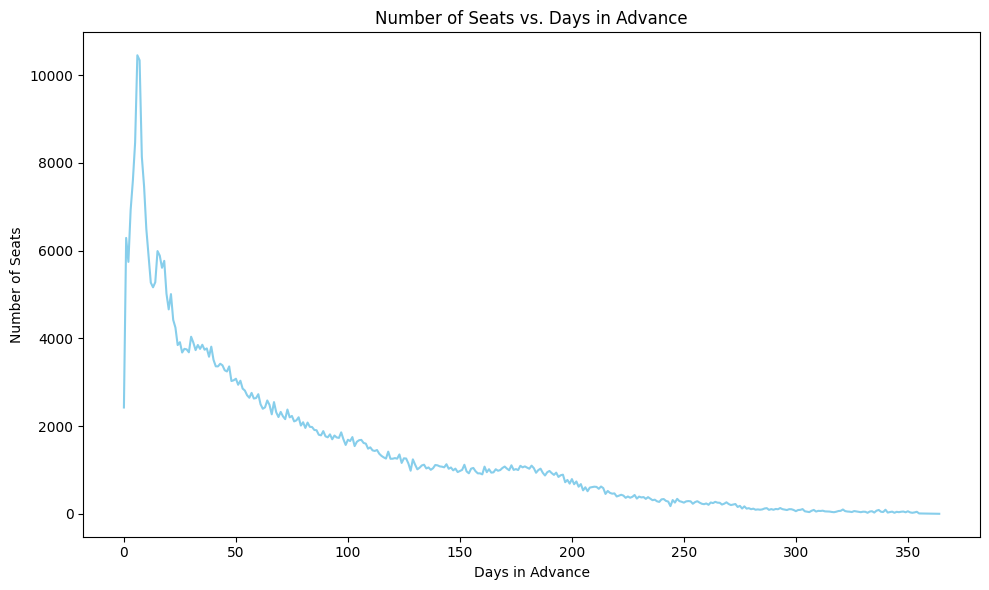

In [11]:
grouped = df.groupby('days_in_advance')['num_seats_total'].sum().reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(data=grouped, x='days_in_advance', y='num_seats_total', color='skyblue')
plt.xlabel('Days in Advance')
plt.ylabel('Number of Seats')
plt.title('Number of Seats vs. Days in Advance')
plt.tight_layout()
plt.show()

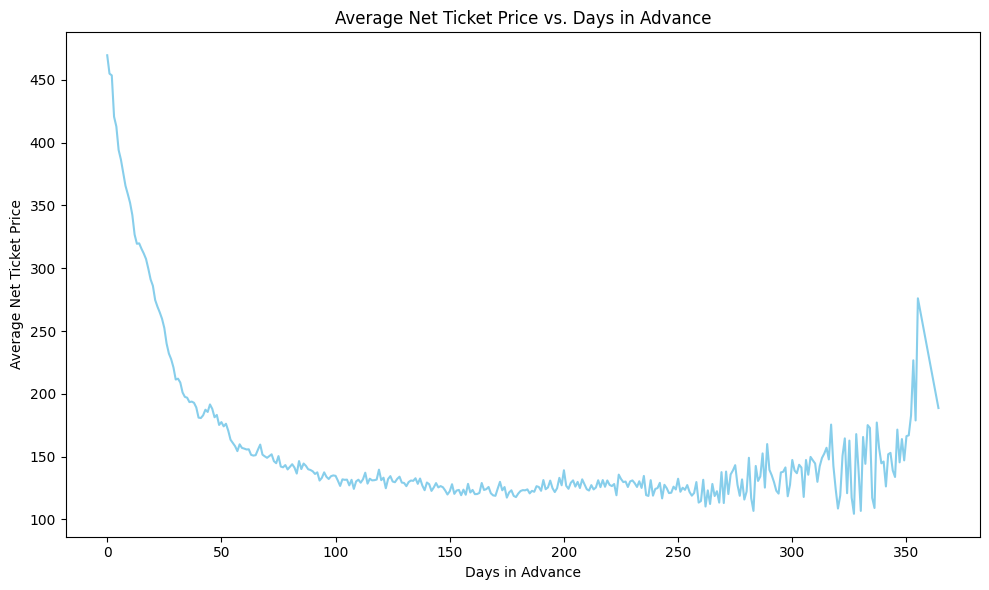

In [12]:
grouped = df.groupby('days_in_advance')['mean_net_ticket_price'].mean().reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(data=grouped, x='days_in_advance', y='mean_net_ticket_price', color='skyblue')
plt.xlabel('Days in Advance')
plt.ylabel('Average Net Ticket Price')
plt.title('Average Net Ticket Price vs. Days in Advance')
plt.tight_layout()
plt.show()

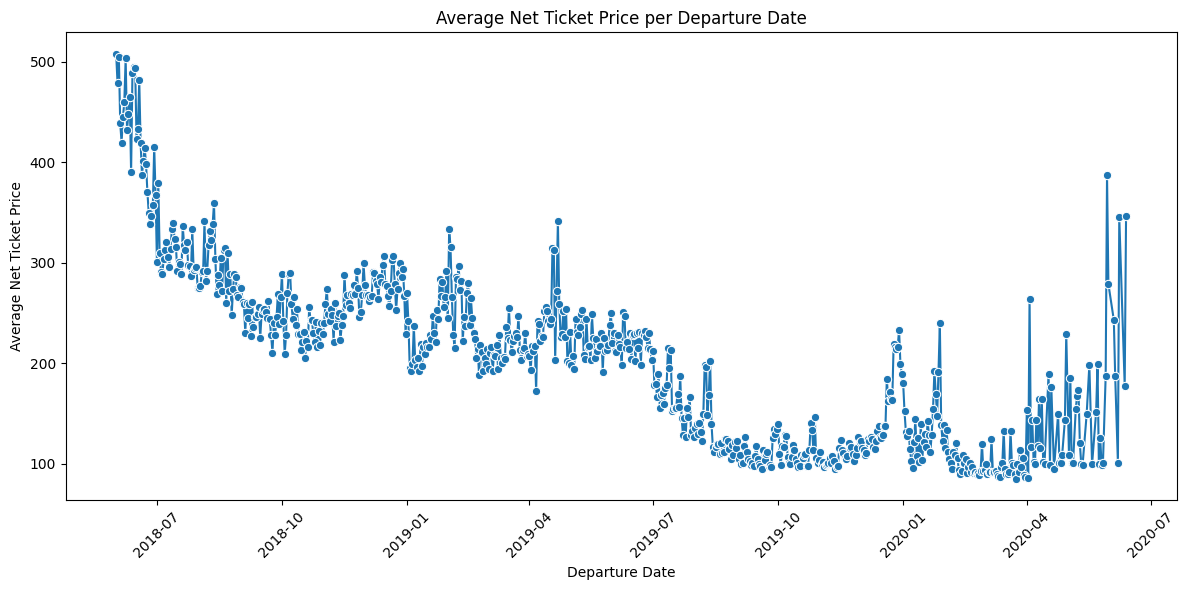

In [13]:
# Group by Dept_Date and calculate average price
avg_price_per_day = df.groupby('Dept_Date')['mean_net_ticket_price'].mean().reset_index()

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=avg_price_per_day, x='Dept_Date', y='mean_net_ticket_price', marker='o')
plt.xlabel('Departure Date')
plt.ylabel('Average Net Ticket Price')
plt.title('Average Net Ticket Price per Departure Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

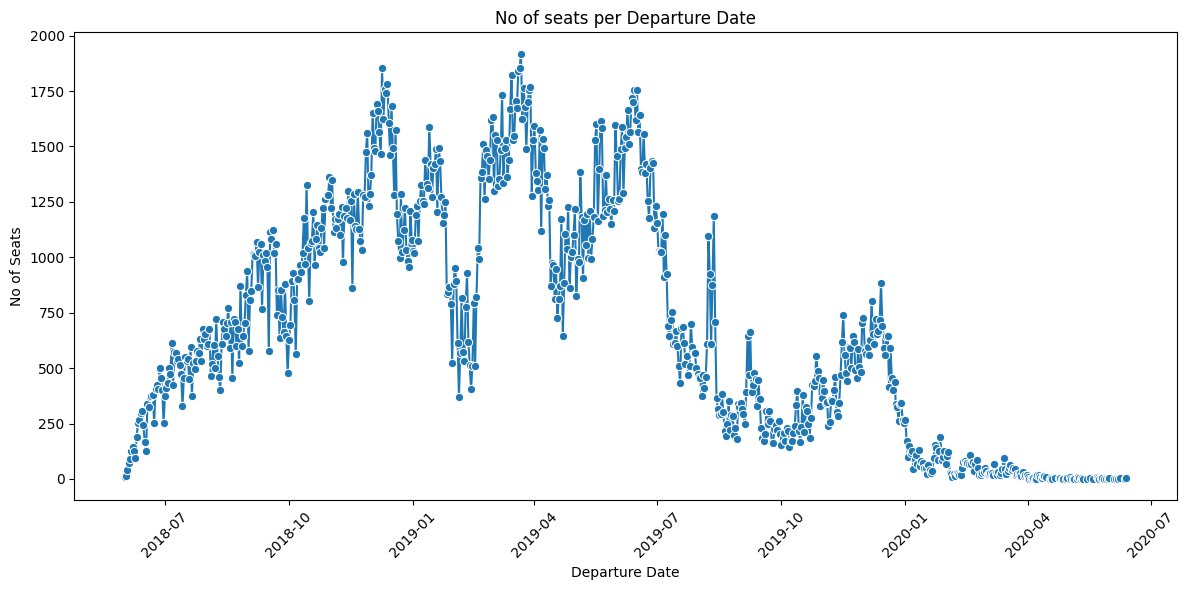

In [14]:
# Group by Dept_Date and calculate average price
grouped_01 = df.groupby('Dept_Date')['num_seats_total'].sum().reset_index()

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=grouped_01, x='Dept_Date', y='num_seats_total', marker='o')
plt.xlabel('Departure Date')
plt.ylabel('No of Seats')
plt.title('No of seats per Departure Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='Customer_Cat'>

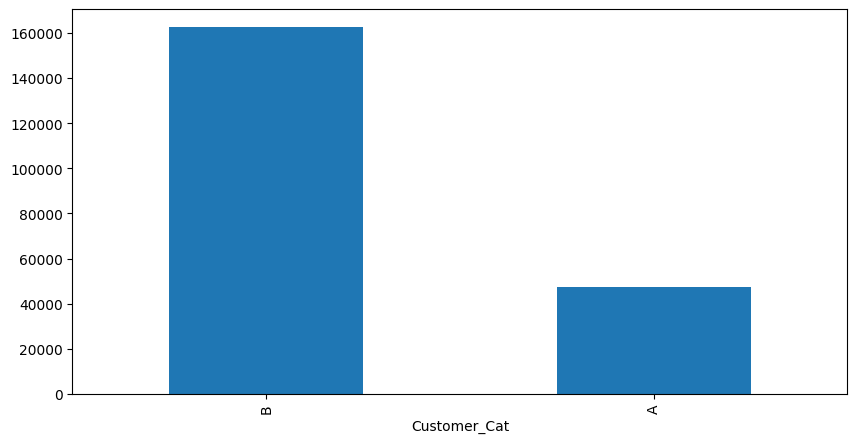

In [15]:
df['Customer_Cat'].value_counts().plot(kind='bar', figsize=(10,5))

<Axes: xlabel='Train_Number_All'>

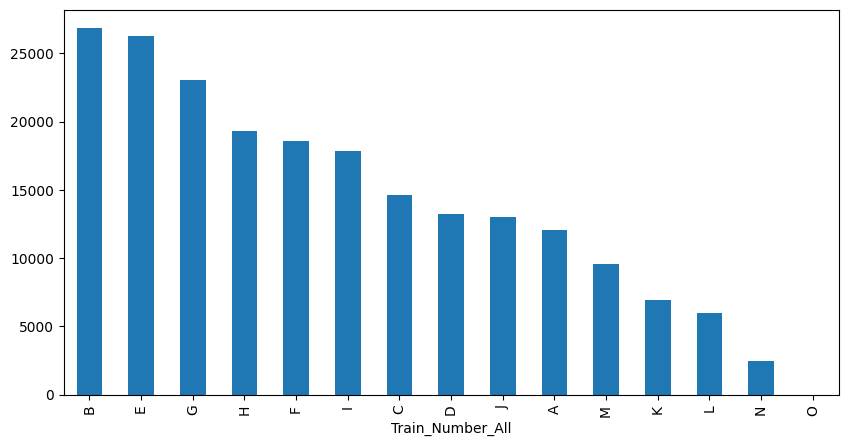

In [16]:
df['Train_Number_All'].value_counts().plot(kind='bar', figsize=(10,5))

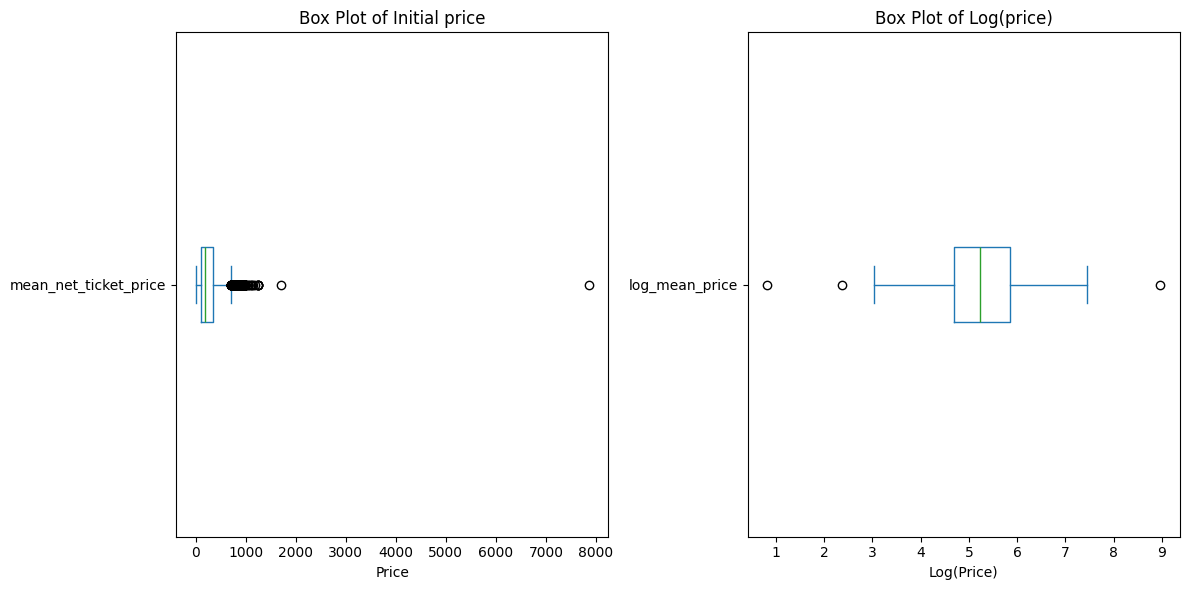

In [17]:
# Checking for the distribution of price
df['log_mean_price'] = np.log(df['mean_net_ticket_price']+1)

# Draft box plot to compare
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Initial Box plot 
df['mean_net_ticket_price'].plot(kind='box', vert=False, ax=axes[0])
axes[0].set_title('Box Plot of Initial price')
axes[0].set_xlabel('Price')

# Box plot (logarit)
df['log_mean_price'].plot(kind='box', vert=False, ax=axes[1])
axes[1].set_title('Box Plot of Log(price)')
axes[1].set_xlabel('Log(Price)')

plt.tight_layout()
plt.show()

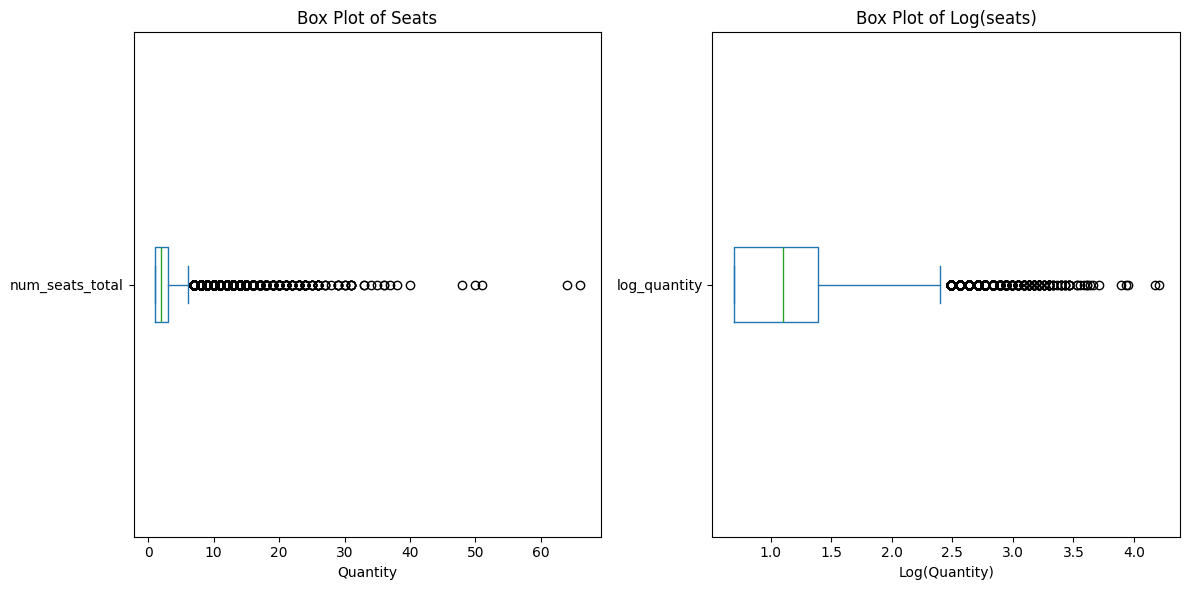

In [18]:
# Draw scatter plot between log(price) and log(seats)
df['log_quantity'] = np.log(df['num_seats_total']+1)

# Draft box plot to compare
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Initial Box plot 
df['num_seats_total'].plot(kind='box', vert=False, ax=axes[0])
axes[0].set_title('Box Plot of Seats')
axes[0].set_xlabel('Quantity')

# Box plot (logarit)
df['log_quantity'].plot(kind='box', vert=False, ax=axes[1])
axes[1].set_title('Box Plot of Log(seats)')
axes[1].set_xlabel('Log(Quantity)')

plt.tight_layout()
plt.show()

Checking the distribution of log(price)

<Axes: >

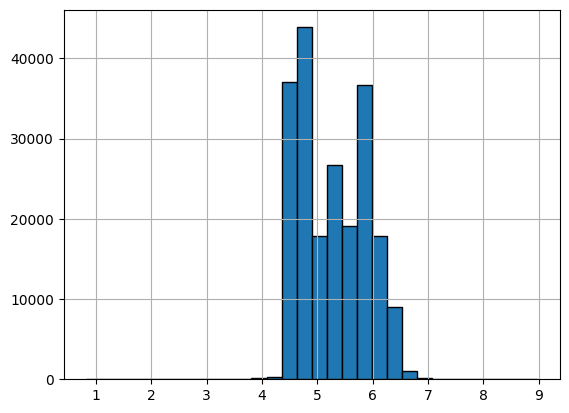

In [19]:
df["log_mean_price"].hist(bins=30, edgecolor="black")

<Axes: >

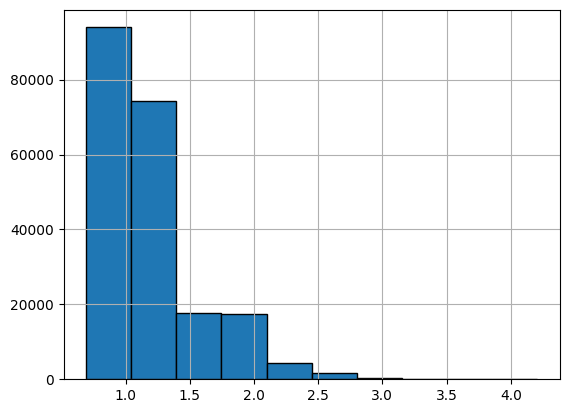

In [20]:
# Draw scatter plot between log(price) and log(seats)
df["log_quantity"].hist(bins=10, edgecolor="black")

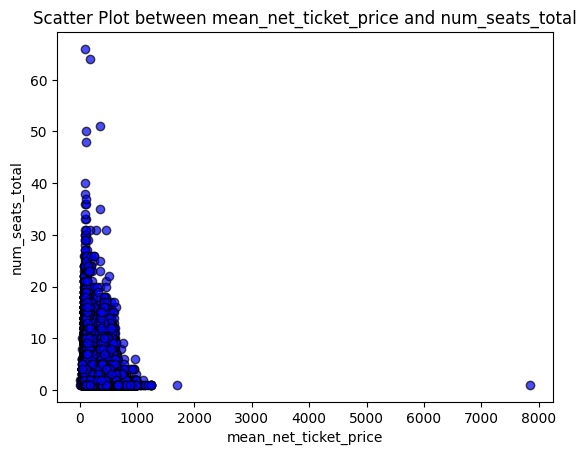

In [21]:
# Draw scatter plot between log(price) and log(seats) to see whether there is a linear relationship
plt.scatter(df['mean_net_ticket_price'], df['num_seats_total'], alpha=0.7, c="blue", edgecolors="k")
plt.title("Scatter Plot between mean_net_ticket_price and num_seats_total")
plt.xlabel("mean_net_ticket_price")
plt.ylabel("num_seats_total")
plt.show()

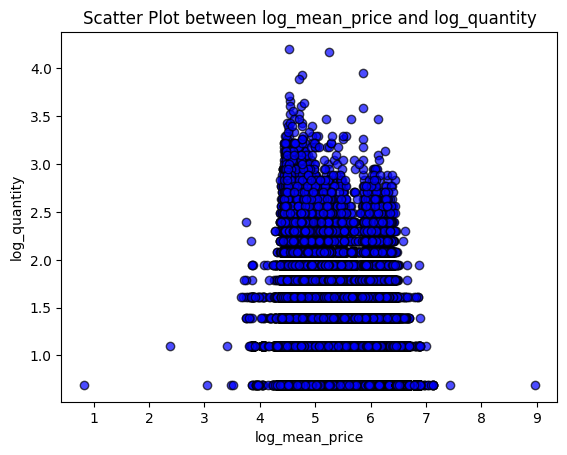

In [22]:
# Draw scatter plot between log(price) and log(seats) to see whether there is a linear relationship
plt.scatter(df['log_mean_price'], df['log_quantity'], alpha=0.7, c="blue", edgecolors="k")
plt.title("Scatter Plot between log_mean_price and log_quantity")
plt.xlabel("log_mean_price")
plt.ylabel("log_quantity")
plt.show()

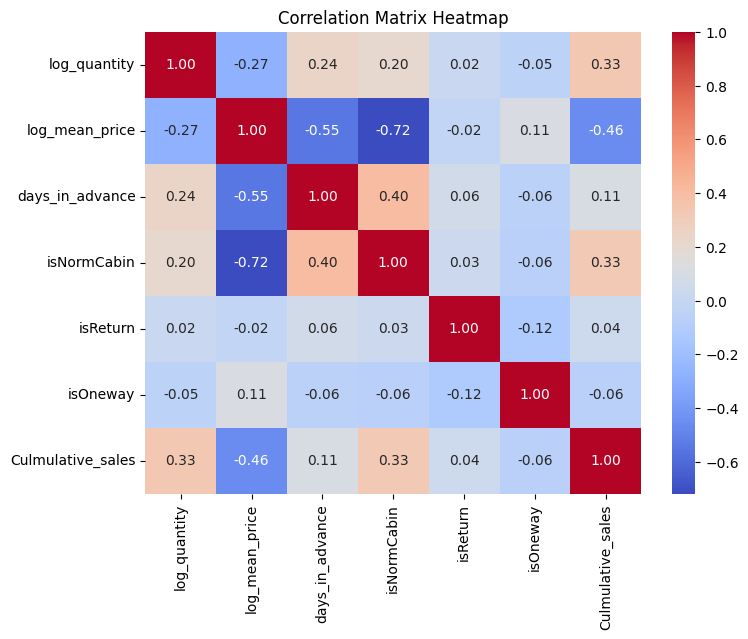

In [23]:
# Select variables of interest
corr_vars = ['log_quantity', 'log_mean_price', 'days_in_advance', 'isNormCabin', 'isReturn', 'isOneway', 'Culmulative_sales']

# Compute correlation matrix
corr_matrix = df[corr_vars].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [24]:
# Calculate VIF for independent variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select relevant columns for VIF calculation
X = df[['log_mean_price', 'isNormCabin', 'isReturn', 'isOneway','days_in_advance', 'Culmulative_sales']].copy()
X = X.dropna()  # Drop NA if any

# Add constant for VIF calculation
X = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

             feature         VIF
0              const  283.651473
1     log_mean_price    2.934443
2        isNormCabin    2.068967
3           isReturn    1.021946
4           isOneway    1.026755
5    days_in_advance    1.498255
6  Culmulative_sales    1.323634


In [25]:
df.describe()

,num_seats_total,mean_net_ticket_price,Dept_Date,Purchase_Date,Culmulative_sales,isNormCabin,isReturn,isOneway,days_in_advance,log_mean_price,log_quantity
count,209697.000000,209697.000000,209697,209697,209697.000000,209697.000000,209697.000000,209697.000000,209697.000000,209697.000000,209697.000000
mean,2.383019,230.116900,2019-02-19 18:47:47.783516416,2018-12-18 12:26:46.683929856,15.875063,0.598249,0.480183,0.122873,63.264596,5.256283,1.095689
min,1.000000,1.278969,2018-06-01 00:00:00,2018-06-01 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.823723,0.693147
25%,1.000000,108.870193,2018-11-05 00:00:00,2018-09-07 00:00:00,3.000000,0.000000,0.000000,0.000000,15.000000,4.699300,0.693147
50%,2.000000,186.282199,2019-02-21 00:00:00,2018-12-19 00:00:00,8.000000,1.000000,0.000000,0.000000,39.000000,5.232617,1.098612
75%,3.000000,350.409481,2019-05-27 00:00:00,2019-04-02 00:00:00,21.000000,1.000000,1.000000,0.000000,91.000000,5.861952,1.386294
max,66.000000,7855.766106,2020-06-13 00:00:00,2019-06-30 00:00:00,187.000000,1.000000,1.000000,1.000000,364.000000,8.969130,4.204693
std,2.083324,147.024784,NaN,NaN,19.795677,0.490253,0.499608,0.328292,65.050759,0.605715,0.458384


#### Run Different Regression (OLS, 2SLS)

OLS 1: log(quantity) = log(price) + days_in_advance + isNormCabin + isReturn + isOneway + Customer_Cat + Train_Number

In [26]:
# OLS 1: log(quantity) = log(price) + days_in_advance + isNormCabin + isReturn + isOneway + Customer_Cat

# Prepare dummy variables for categorical features
df_ols = pd.get_dummies(df, columns=['Customer_Cat','Train_Number_All'], drop_first=True)

# Define the formula for OLS regression
formula = 'log_quantity ~ log_mean_price + days_in_advance + isNormCabin + isReturn + isOneway'
# Add all Customer_Cat and Train_Number dummies to the formula
customer_cat_dummies = [col for col in df_ols.columns if col.startswith('Customer_Cat_') or col.startswith('Train_Number_All_')]
if customer_cat_dummies:
    formula += ' + ' + ' + '.join(customer_cat_dummies)

# Fit the OLS model
ols_model1 = smf.ols(formula=formula, data=df_ols).fit()

# Print the summary
print(ols_model1.summary())

                            OLS Regression Results                            
Dep. Variable:           log_quantity   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     1489.
Date:                Fri, 19 Sep 2025   Prob (F-statistic):               0.00
Time:                        12:12:12   Log-Likelihood:            -1.2005e+05
No. Observations:              209697   AIC:                         2.401e+05
Df Residuals:                  209676   BIC:                         2.403e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

OLS 2: log(quantity) = log(price) + days_in_advance + isNormCabin + isReturn + isOneway + Customer_Cat + Train_Number + month + day_of_week

In [27]:
# OLS 2
# Create month and day of week columns
df['month'] = df['Dept_Date'].dt.month
df['day_of_week'] = df['Dept_Date'].dt.dayofweek  # Monday=0, Sunday=6

# Create dummies for month and day_of_week
df_ols = pd.get_dummies(df, columns=['Customer_Cat', 'month', 'day_of_week','Train_Number_All'], drop_first=True)

# Define the formula for OLS regression
formula = 'log_quantity ~ log_mean_price + days_in_advance + isNormCabin + isReturn + isOneway'

# Add all Customer_Cat, month, and day_of_week dummies to the formula
dummy_cols = [col for col in df_ols.columns if col.startswith('Customer_Cat_') or col.startswith('month_') or col.startswith('day_of_week_') or col.startswith('Train_Number_All_')]
if dummy_cols:
    formula += ' + ' + ' + '.join(dummy_cols)

# Fit the OLS model
ols_model2 = smf.ols(formula=formula, data=df_ols).fit()

# Print the summary
print(ols_model2.summary())

                            OLS Regression Results                            
Dep. Variable:           log_quantity   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     920.6
Date:                Fri, 19 Sep 2025   Prob (F-statistic):               0.00
Time:                        12:12:13   Log-Likelihood:            -1.1819e+05
No. Observations:              209697   AIC:                         2.365e+05
Df Residuals:                  209659   BIC:                         2.368e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

OLS 3: OLS 2 + interaction term between price and days_in_advance

In [28]:
# OLS 3: Add interaction term between days_in_advance and log_mean_price

# Create dummies for categorical variables
df_ols = pd.get_dummies(df, columns=['Customer_Cat', 'month', 'day_of_week','Train_Number_All'], drop_first=True)

# Define the formula with interaction term
formula = 'log_quantity ~ log_mean_price * days_in_advance + isNormCabin + isReturn + isOneway'

# Add all Customer_Cat, month, and day_of_week dummies to the formula
dummy_cols = [col for col in df_ols.columns if col.startswith('Customer_Cat_') or col.startswith('month_') or col.startswith('day_of_week_') or col.startswith('Train_Number_All_')]
if dummy_cols:
    formula += ' + ' + ' + '.join(dummy_cols)

# Fit the OLS model
ols_model3 = smf.ols(formula=formula, data=df_ols).fit()

# Print the summary
print(ols_model3.summary())

                            OLS Regression Results                            
Dep. Variable:           log_quantity   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     975.2
Date:                Fri, 19 Sep 2025   Prob (F-statistic):               0.00
Time:                        12:12:14   Log-Likelihood:            -1.1691e+05
No. Observations:              209697   AIC:                         2.339e+05
Df Residuals:                  209658   BIC:                         2.343e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

OLS 4: OLS 3 + is_2020

In [29]:
# 2020 is imnormal
df['year'] = df['Dept_Date'].dt.year
df['is_2020'] = (df['year'] == 2020).astype(int)

# Create dummies for categorical variables
df_ols = pd.get_dummies(df, columns=['Customer_Cat', 'month', 'day_of_week','Train_Number_All'], drop_first=True)

# Define the formula with interaction term
formula = 'log_quantity ~ log_mean_price * days_in_advance + isNormCabin + isReturn + isOneway + is_2020'

# Add all Customer_Cat, month, and day_of_week dummies to the formula
dummy_cols = [col for col in df_ols.columns if col.startswith('Customer_Cat_') or col.startswith('month_') or col.startswith('day_of_week_') or col.startswith('Train_Number_All_')]
if dummy_cols:
    formula += ' + ' + ' + '.join(dummy_cols)

# Fit the OLS model
ols_model4 = smf.ols(formula=formula, data=df_ols).fit()

# Print the summary
print(ols_model4.summary())

                            OLS Regression Results                            
Dep. Variable:           log_quantity   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     959.5
Date:                Fri, 19 Sep 2025   Prob (F-statistic):               0.00
Time:                        12:12:15   Log-Likelihood:            -1.1675e+05
No. Observations:              209697   AIC:                         2.336e+05
Df Residuals:                  209657   BIC:                         2.340e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

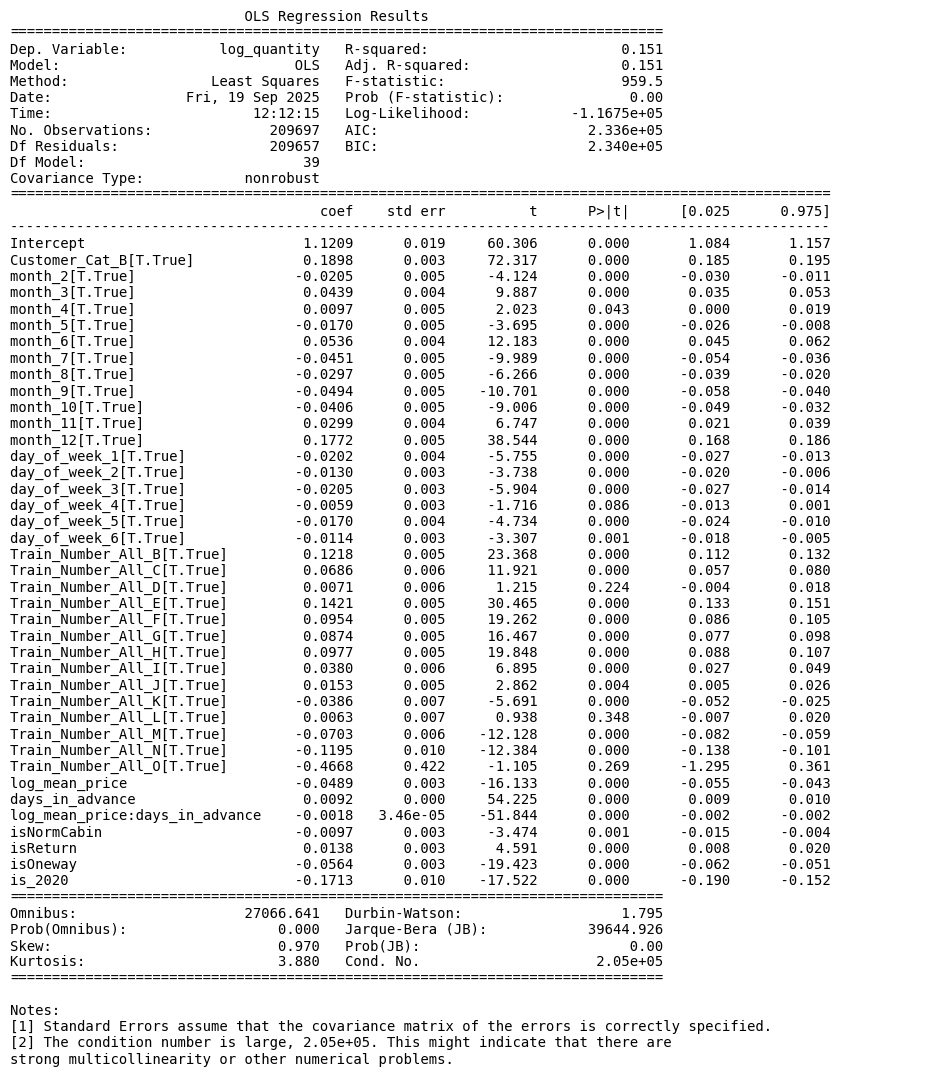

In [30]:
summary_text = ols_model4.summary().as_text()

# print image
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis("off")
ax.text(0, 1, summary_text, fontsize=10, family="monospace", va="top")

plt.savefig("ols_model4_summary.png", dpi=300, bbox_inches="tight")
plt.show()

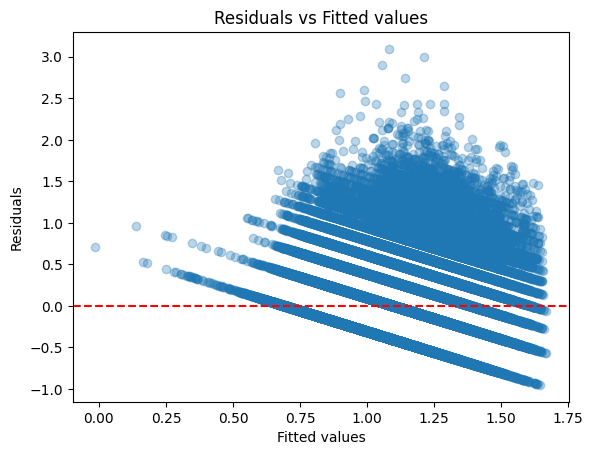

In [31]:
# Check heteroskedasticity
# Lấy residual và fitted values
residuals = ols_model4.resid
fitted = ols_model4.fittedvalues

plt.scatter(fitted, residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.show()


2SLS with instrumental variable is Other train price at the same day

In [32]:
df.columns

Index(['num_seats_total', 'mean_net_ticket_price', 'Dept_Date',
       'Purchase_Date', 'Train_Number_All', 'Culmulative_sales', 'isNormCabin',
       'isReturn', 'isOneway', 'Customer_Cat', 'days_in_advance',
       'log_mean_price', 'log_quantity', 'month', 'day_of_week', 'year',
       'is_2020'],
      dtype='object')

In [33]:
## Create IV - Other trains' average price
# ---- STEP 1: Compute average price per train × day ----
avg_price = (
    df.groupby(["Dept_Date", "Train_Number_All"])["mean_net_ticket_price"]
    .mean()
    .rename("avg_price_day")
    .reset_index()
)

# ---- STEP 2: Compute leave-one-out mean of other trains ----
# Total sum of avg prices and number of trains per day
agg_date = avg_price.groupby("Dept_Date").agg(
    grand_sum=("avg_price_day", "sum"),
    n_trains=("Train_Number_All", "nunique")
).reset_index()

# Merge to train-level averages
avg_price = avg_price.merge(agg_date, on="Dept_Date", how="left")

# Compute leave-one-out average price of OTHER trains
avg_price["other_trains_avg"] = (
    (avg_price["grand_sum"] - avg_price["avg_price_day"]) /
    (avg_price["n_trains"] - 1)
)

# Drop days with only one train (no "other train" possible)
avg_price = avg_price[avg_price["n_trains"] > 1].copy()

# ---- STEP 3: Merge instrument back to original df ----
df_iv = df.merge(
    avg_price[["Dept_Date", "Train_Number_All", "other_trains_avg"]],
    on=["Dept_Date", "Train_Number_All"], how="left"
)

# ---- STEP 4: Create log version (instrument) ----
df_iv = df_iv[df_iv["other_trains_avg"] > 0].copy()
df_iv["lnOtherP"] = np.log(df_iv["other_trains_avg"])

# Create dummies for categorical variables
df_iv = pd.get_dummies(df_iv, columns=['Customer_Cat', 'month', 'day_of_week','Train_Number_All'], drop_first=True)

# Add all Customer_Cat, month, and day_of_week dummies to the formula
dummy_cols = [col for col in df_iv.columns if col.startswith('Customer_Cat_') or col.startswith('month_') or col.startswith('day_of_week_') or col.startswith('Train_Number_All_')]
if dummy_cols:
    formula += ' + ' + ' + '.join(dummy_cols)

df_iv



,num_seats_total,mean_net_ticket_price,Dept_Date,Purchase_Date,Culmulative_sales,isNormCabin,isReturn,isOneway,days_in_advance,log_mean_price,...,Train_Number_All_F,Train_Number_All_G,Train_Number_All_H,Train_Number_All_I,Train_Number_All_J,Train_Number_All_K,Train_Number_All_L,Train_Number_All_M,Train_Number_All_N,Train_Number_All_O
0,1,188.663422,2019-10-09,2018-10-10,1,1,0,0,364,5.245251,...,False,False,False,False,False,False,False,False,False,False
1,1,358.428869,2019-05-27,2018-06-06,1,0,1,0,355,5.884516,...,False,False,False,False,False,False,False,False,False,False
2,1,356.372684,2020-05-31,2019-06-17,1,0,1,0,349,5.878779,...,False,False,False,False,False,False,False,False,False,False
3,1,396.370505,2019-12-10,2018-12-27,1,0,1,0,348,5.984869,...,False,False,False,False,False,False,False,False,False,False
4,1,364.264552,2020-05-31,2019-06-19,2,0,1,0,347,5.900622,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209692,4,468.650069,2019-03-26,2019-03-26,4,0,0,0,0,6.151988,...,False,False,False,False,False,False,True,False,False,False
209693,1,468.659177,2018-12-21,2018-12-21,1,0,0,1,0,6.152007,...,False,False,False,False,True,False,False,False,False,False
209694,1,668.061946,2019-06-09,2019-06-09,10,0,0,0,0,6.505877,...,False,False,False,False,True,False,False,False,False,False
209695,2,381.438513,2019-01-17,2019-01-17,17,0,0,0,0,5.946568,...,False,False,False,False,False,False,True,False,False,False


In [34]:
# %% 2SLS regression - 1st stage 
# 1) Define endogenous stack and instrument stack
df_iv["lnP_DayAdv"] = df_iv["log_mean_price"] * df_iv["days_in_advance"] 
df_iv["lnOtherP_DayAdv"] = df_iv["lnOtherP"] * df_iv["days_in_advance"] 

# 3) Controls (adjust to your available columns)
ctrl_cols = []
for c in ["days_in_advance", "isNormCabin", "isReturn", "isOneway","is_2020"]:
    if c in df_iv.columns:
        ctrl_cols.append(c)
for pref in ["Customer_Cat_", "month_", "dayofweek_", "Train_Number_All_"]:
    ctrl_cols += [c for c in df_iv.columns if c.startswith(pref)]

X_ctrl = sm.add_constant(df_iv[ctrl_cols].astype(float), has_constant="add")

# Endogenous regressors: log_mean_price, log_mean_price*DaysinAdvance
Y_endog = df_iv[["log_mean_price", "lnP_DayAdv"]].astype(float)

# Instrument set: lnOtherP, log_other_price*DaysinAdvance  (+ ALL controls as included instruments)
Z_excl = df_iv[["lnOtherP", "lnOtherP_DayAdv"]].astype(float)

# 2) First-stage regressions for each endogenous regressor
def first_stage_fit(y, X_incl, Z_excl):
    """Return model, fitted values, and partial F-stat for excluded instruments."""
    X_full = pd.concat([X_incl, Z_excl], axis=1)
    mod_u = sm.OLS(y, X_full).fit()
    mod_r = sm.OLS(y, X_incl).fit()
    rss_u = np.sum(mod_u.resid**2)
    rss_r = np.sum(mod_r.resid**2)
    df_num = Z_excl.shape[1]
    df_den = mod_u.df_resid
    F = ((rss_r - rss_u) / df_num) / (rss_u / df_den)
    return mod_u, mod_u.fittedvalues, F

# First stage for lnP
fs_lnP, lnP_hat, F_lnP = first_stage_fit(df_iv["log_mean_price"], X_ctrl, Z_excl)
fs_priceadv, priceadv_hat, F_priceadv = first_stage_fit(df_iv["lnP_DayAdv"], X_ctrl, Z_excl)

print(f"[First stage] partial F for lnP:              {F_lnP:,.2f}")
print(fs_lnP.summary())

print(f"[First stage] partial F for lnP*Days_in_Advance:              {F_priceadv:,.2f}")
print(fs_priceadv.summary())

[First stage] partial F for lnP:              4,885.28
                            OLS Regression Results                            
Dep. Variable:         log_mean_price   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                 1.309e+04
Date:                Fri, 19 Sep 2025   Prob (F-statistic):               0.00
Time:                        12:12:19   Log-Likelihood:                -75112.
No. Observations:              209672   AIC:                         1.503e+05
Df Residuals:                  209638   BIC:                         1.506e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [35]:
# %% 2sls regression - 2nd stage regression 
X_second = pd.concat([X_ctrl,
                      lnP_hat.rename("lnP_hat"),
                      priceadv_hat.rename("Price_DayAdv_hat")], axis=1)

sls2_model = sm.OLS(df_iv["log_quantity"], X_second).fit()
print("\n[Second stage] IV with interactions (coeff table):")
print(sls2_model.summary().tables[1])


[Second stage] IV with interactions (coeff table):
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.0588      0.075     14.166      0.000       0.912       1.205
days_in_advance        0.0030      0.001      4.142      0.000       0.002       0.004
isNormCabin            0.0111      0.008      1.376      0.169      -0.005       0.027
isReturn               0.0109      0.003      3.502      0.000       0.005       0.017
isOneway              -0.0574      0.003    -17.581      0.000      -0.064      -0.051
is_2020               -0.1698      0.011    -15.393      0.000      -0.191      -0.148
Customer_Cat_B         0.1956      0.004     52.490      0.000       0.188       0.203
month_2               -0.0225      0.005     -4.461      0.000      -0.032      -0.013
month_3                0.0554      0.005     11.839      0.000       0.046    

In [36]:
# STEP 4: Second-stage regression
# =============================================
X_second = pd.concat([X_ctrl, lnP_hat.rename("lnP_hat"), priceadv_hat.rename("Price_DayAdv_hat")], axis=1)
sls2_model = sm.OLS(df_iv["log_quantity"], X_second).fit()

print("\n[2nd stage] IV regression summary:")
print(sls2_model.summary())


[2nd stage] IV regression summary:
                            OLS Regression Results                            
Dep. Variable:           log_quantity   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     956.2
Date:                Fri, 19 Sep 2025   Prob (F-statistic):               0.00
Time:                        12:12:21   Log-Likelihood:            -1.1926e+05
No. Observations:              209672   AIC:                         2.386e+05
Df Residuals:                  209638   BIC:                         2.389e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------


Summary

In [42]:
def model_metrics(model, coef_name='log_mean_price'):
    coef = model.params[coef_name]
    se = model.bse[coef_name]
    t = model.tvalues[coef_name]
    p = model.pvalues[coef_name]
    residuals = model.resid
    SSR = np.sum(residuals**2)
    MSE = np.mean(residuals**2)
    RMSE = np.sqrt(MSE)
    MAE = np.mean(np.abs(residuals))
    R2 = model.rsquared
    return [coef, se, t, p, SSR, MSE, RMSE, MAE, R2]

# Lấy thông số cho từng model
results = []
model_names = ['OLS1', 'OLS2', 'OLS3', 'OLS4']
models = [ols_model1, ols_model2, ols_model3, ols_model4]  # Đảm bảo bạn đã fit các model này

for name, model in zip(model_names, models):
    metrics = model_metrics(model)
    results.append([name] + metrics)

# Tạo DataFrame để hiển thị
columns = ['Model', 'Coef_lnP', 'SE_lnP', 't_lnP', 'p_lnP', 'SSR', 'MSE', 'RMSE', 'MAE', 'R2']
df_results = pd.DataFrame(results, columns=columns)
print(df_results)

  Model  Coef_lnP    SE_lnP      t_lnP         p_lnP           SSR       MSE  \
0  OLS1 -0.097566  0.002543 -38.368333  0.000000e+00  38579.849244  0.183979   
1  OLS2 -0.131696  0.002625 -50.169522  0.000000e+00  37902.695599  0.180750   
2  OLS3 -0.055501  0.003010 -18.439837  7.228138e-76  37442.328769  0.178554   
3  OLS4 -0.048902  0.003031 -16.133056  1.621005e-58  37387.578725  0.178293   

       RMSE       MAE        R2  
0  0.428928  0.342186  0.124390  
1  0.425147  0.338251  0.139759  
2  0.422557  0.335648  0.150207  
3  0.422248  0.335393  0.151450  


In [45]:
results = []
model_names = ['OLS1', 'OLS2', 'OLS3', 'OLS4',"2SLS"]
models = [ols_model1, ols_model2, ols_model3, ols_model4, sls2_model]  # Đảm bảo bạn đã fit các model này

for name, model in zip(model_names, models):
        if name == "2SLS":
            coef = model.params["lnP_hat"]
            se = model.bse["lnP_hat"]
            t = model.tvalues["lnP_hat"]
            p = model.pvalues["lnP_hat"]
            residuals = model.resid
            SSR = np.sum(residuals**2)
            MSE = np.mean(residuals**2)
            RMSE = np.sqrt(MSE)
            MAE = np.mean(np.abs(residuals))
            R2 = model.rsquared
            results.append([name, coef, se, t, p, SSR, MSE, RMSE, MAE, R2])
        else:
            metrics = model_metrics(model)
            results.append([name] + metrics)

# Tạo DataFrame để hiển thị
columns = ['Model', 'Coef_lnP', 'SE_lnP', 't_lnP', 'p_lnP', 'SSR', 'MSE', 'RMSE', 'MAE', 'R2']
df_results = pd.DataFrame(results, columns=columns)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000) # Tùy chọn: Tăng chiều rộng hiển thị
print(df_results)

  Model  Coef_lnP    SE_lnP      t_lnP         p_lnP           SSR       MSE      RMSE       MAE        R2
0  OLS1 -0.097566  0.002543 -38.368333  0.000000e+00  38579.849244  0.183979  0.428928  0.342186  0.124390
1  OLS2 -0.131696  0.002625 -50.169522  0.000000e+00  37902.695599  0.180750  0.425147  0.338251  0.139759
2  OLS3 -0.055501  0.003010 -18.439837  7.228138e-76  37442.328769  0.178554  0.422557  0.335648  0.150207
3  OLS4 -0.048902  0.003031 -16.133056  1.621005e-58  37387.578725  0.178293  0.422248  0.335393  0.151450
4  2SLS -0.044908  0.012623  -3.557589  3.743566e-04  38291.737465  0.182627  0.427349  0.339413  0.130825


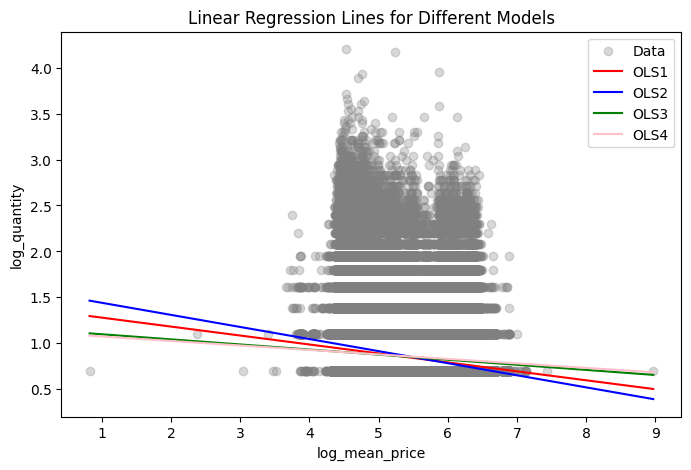

In [38]:
# Draw regression lines for each model
# Scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(df['log_mean_price'], df['log_quantity'], alpha=0.3, label='Data', color='gray')

# Danh sách các model, màu sắc và label
models = [
    (ols_model1, 'red', 'OLS1'),
    (ols_model2, 'blue', 'OLS2'),
    (ols_model3, 'green', 'OLS3'),
    (ols_model4, 'pink', 'OLS4')
]

# Tạo giá trị x để vẽ đường thẳng
x_vals = np.linspace(df['log_mean_price'].min(), df['log_mean_price'].max(), 100)

# Vẽ các đường regression bằng vòng lặp
for model, color, label in models:
    y_vals = model.params['log_mean_price'] * x_vals + model.params['Intercept']
    plt.plot(x_vals, y_vals, color=color, label=label)

plt.xlabel('log_mean_price')
plt.ylabel('log_quantity')
plt.title('Linear Regression Lines for Different Models')
plt.legend()
plt.show()
